# Load and Inspect The Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Google Datasets/googleplaystore.csv")

In [5]:
# import librabries
import pandas as pd
import matplotlib.pyplot as pd
import seaborn as sns
import numpy as np

**Dataset** **Information**

In [ ]:
# Retrive the info from DataFrame dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Check the number of missing values and then sum them
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Display the shape of dataset
dataset.shape

(10841, 13)

**Data Preprocessing and Cleaning**

Rating

In [ ]:
# Calculate the mean of the 'Rating' column excluding NaN values
rating_mean = dataset['Rating'].mean()

# Replace NaN values with the mean
dataset['Rating'].fillna(rating_mean, inplace=True)


In [ ]:
# Check for NaN values in the 'Rating' column
nan_check_rating = dataset['Rating'].isna().any()
print("NaN values :", nan_check_rating)

NaN values : False


In [ ]:
# Retrive the unique values in 'Rating' column
dataset['Rating'].unique()

array([ 4.1       ,  3.9       ,  4.7       ,  4.5       ,  4.3       ,
        4.4       ,  3.8       ,  4.2       ,  4.6       ,  3.2       ,
        4.        ,  4.19333832,  4.8       ,  4.9       ,  3.6       ,
        3.7       ,  3.3       ,  3.4       ,  3.5       ,  3.1       ,
        5.        ,  2.6       ,  3.        ,  1.9       ,  2.5       ,
        2.8       ,  2.7       ,  1.        ,  2.9       ,  2.3       ,
        2.2       ,  1.7       ,  2.        ,  1.8       ,  2.4       ,
        1.6       ,  2.1       ,  1.4       ,  1.5       ,  1.2       ,
       19.        ])

Reviews

In [ ]:
# Select and display the row of 'Reviews' columns which value is not numeric
dataset[~dataset.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [ ]:
# Update the value of row index 10472 with 3000000
dataset.at[10472, 'Reviews'] = 3000000

In [ ]:
# Extract and print the data of row 10472
row_10472 = dataset.iloc[10472]
print(row_10472)

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                           3000000
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                          11-Feb-18
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


In [ ]:
# Convert the 'Reviews' column in the 'dataset' to integer data type
dataset["Reviews"] = dataset["Reviews"].astype(int)

In [ ]:
# Retrive the info from DataFrame dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


Size

In [ ]:
# Retrive the unique values in 'Size' column
dataset['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
import pandas as pd
import numpy as np

# Replace 'M' with '000' and remove 'k', also handle 'Varies with device'
dataset['Size'] = dataset['Size'].replace(['Varies with device', '1,000+'], np.nan)
dataset['Size'] = dataset['Size'].str.replace('M', '000').str.replace('k', '')

# Remove non-numeric characters (except '.')
dataset['Size'] = dataset['Size'].replace('[^\d.]', '', regex=True)

# Convert to numeric, errors='coerce' will replace non-convertible values with NaN
dataset['Size'] = pd.to_numeric(dataset['Size'], errors='coerce')

# Replace NaN with 0 (or any other suitable strategy)
dataset['Size'] = dataset['Size'].fillna(0)

# Convert to a common unit, for example, megabytes (MB)
dataset['Size'] = dataset['Size'] / 1000

# Print the cleaned 'Size' column
print(dataset['Size'])

0        19.0000
1        14.0000
2         0.0087
3        25.0000
4         0.0028
          ...   
10836    53.0000
10837     0.0036
10838     0.0095
10839     0.0000
10840    19.0000
Name: Size, Length: 10841, dtype: float64


Installs

In [ ]:
# Retrive the unique values in 'Installs' column
dataset['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
# Remove specified characters ('+' and ',') from the values in the 'Installs' column of the 'dataset'
additinal_item = ['+' , ',' ]
target_cols = ['Installs' ]
for item in additinal_item:
    for col in target_cols:
        dataset[col] = dataset[col].str.replace(item,'')


# Display the first few rows of the updated 'dataset'
dataset.head()

<ipython-input-27-950fe96b1516>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset[col] = dataset[col].str.replace(item,'')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0000,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0000,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0.0087,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0000,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0.0028,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
# Select the row which isnot numeric
dataset[~dataset.Installs.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,0.0,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [ ]:
# Drop the column of index 10472
dataset = dataset.drop(10472)

In [ ]:
# Convert the 'Installs' column to numeric
dataset['Installs'] = pd.to_numeric(dataset['Installs'], errors='coerce')

# Drop rows with NaN values in the 'Installs' column
dataset = dataset.dropna(subset=['Installs'])

# Convert 'Installs' column to integer
dataset['Installs'] = dataset['Installs'].astype(int)

In [ ]:
# Retrive the info from DataFrame dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


Price

In [ ]:
# Retrieve unique values of 'Price' column
dataset['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [ ]:
# Remove $ from tha values in 'Price' column
additinal_item = ['$']
target_cols = ['Price']
for item in additinal_item:
    for col in target_cols:
        dataset[col] = dataset[col].str.replace(item,'')

# Display a random sample of 5 rows
dataset.sample(5)

<ipython-input-32-a89c34a0282b>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset[col] = dataset[col].str.replace(item,'')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3971,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0000,500000000,Free,0,Teen,Communication,2-Aug-18,12.8.5.1121,4.0 and up
3347,AppLock - Fingerprint,TOOLS,4.4,745245,0.0035,10000000,Free,0,Everyone,Tools,13-Apr-18,7.2.0,2.3 and up
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,0.0000,100000,Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
2059,Strawberry Shortcake Ice Cream Island,FAMILY,4.2,32029,15.0000,5000000,Free,0,Everyone,Casual;Pretend Play,6-Nov-17,1.2,4.1 and up
9742,Foot Surgery Hospital Simulator: ER Doctor Games,FAMILY,3.9,314,28.0000,100000,Free,0,Everyone,Casual,15-Jan-18,1.1,5.1 and up


In [ ]:
# Convert the 'Price' column to numeric
dataset['Price'] = pd.to_numeric(dataset['Price'], errors='coerce')

# Drop rows with NaN values in the 'Price' column
dataset = dataset.dropna(subset=['Price'])

# Convert 'Installs' column to integer
dataset['Price'] = dataset['Price'].astype(int)

In [ ]:
# Retrive the info from DataFrame dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  int64  
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


Content Rating

In [ ]:
# Retrieve unique values of 'Content Rating' column
dataset['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Last Updated

In [ ]:
# Retrieve unique values of 'Last Updated' column
dataset['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [ ]:
# Convert the 'Last Updated' column to datetime format
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'])

# Display the first 10 rows of the 'Last Updated' column after conversion
print(dataset['Last Updated'].head(10))

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
5   2017-03-26
6   2018-04-26
7   2018-06-14
8   2017-09-20
9   2018-07-03
Name: Last Updated, dtype: datetime64[ns]


In [ ]:
# Extract and create new columns for month and year from the 'Last Updated' column
dataset['Updated_Month'] = dataset['Last Updated'].dt.month
dataset['Updated_Year'] = dataset['Last Updated'].dt.year

In [ ]:
# Drop 'Last Updated' column
dataset.drop('Last Updated', axis=1, inplace=True)

In [ ]:
# Display 5 random samples
dataset.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
977,A&E - Watch Full Episodes of TV Shows,ENTERTAINMENT,4.0,29706,19.0000,1000000,Free,0,Teen,Entertainment,3.1.4,4.4 and up,7,2018
6741,BS Battery+,TOOLS,4.3,269,0.6470,50000,Free,0,Everyone,Tools,4.0.1,2.0 and up,8,2012
7518,Leica CL,PHOTOGRAPHY,2.6,8,0.0024,1000,Free,0,Everyone,Photography,1,4.1 and up,11,2017
5653,AU Mobile Indonesia,GAME,3.6,16521,23.0000,1000000,Free,0,Everyone,Music,1.8.0502,2.3 and up,5,2018
8931,dv Prompter,VIDEO_PLAYERS,3.7,321,0.0013,50000,Free,0,Everyone,Video Players & Editors,1.2.9,4.2 and up,3,2017


Type

In [ ]:
# Retrieve the unique values of 'Type' column
dataset['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
# Fill missing values in the 'Type' column with the mode
dataset['Type'].fillna(str(dataset['Type'].mode().values[0]),inplace=True)

In [ ]:
# Retrieve the unique values of 'Type' column
dataset['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# Find the null values in the dataset and sum them
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

Dealing With Missing Value

In [ ]:
# Display the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  int64  
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int64  
 13  Updated_Year    10840 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


In [ ]:
# Find the null value in the dataset and sum them
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

Duplicate Data Cleaning

In [ ]:
# Check for duplicate rows in the 'dataset' and print the total number of duplicates
duplicate = dataset.duplicated()
print(duplicate.sum())

484


In [ ]:
# Drop duplicate rows
dataset.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicate rows in the 'dataset' and print the total number of duplicates
duplicate = dataset.duplicated()
print(duplicate.sum())

0


# EDA

Numeric Analysis

In [ ]:
# Generate descriptive statistics for the 'dataset'
dataset.describe()

,Rating,Reviews,Size,Installs,Price,Updated_Month,Updated_Year
count,10356.000000,1.035600e+04,10356.000000,1.035600e+04,10356.000000,10356.000000,10356.000000
mean,4.188648,4.059308e+05,16.476799,1.415816e+07,0.965334,6.396871,2017.382870
std,0.484047,2.696907e+06,23.194144,8.024342e+07,16.227602,2.606437,1.112803
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2010.000000
25%,4.100000,3.200000e+01,0.003200,1.000000e+03,0.000000,5.000000,2017.000000
50%,4.200000,1.678500e+03,0.240500,1.000000e+05,0.000000,7.000000,2018.000000
75%,4.500000,4.638075e+04,26.000000,1.000000e+06,0.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,12.000000,2018.000000


In [ ]:
# Counts unique category
category_counts = dataset['Category'].value_counts()
print(category_counts)

FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64


In [ ]:
# Find the minimum and maximum values in the 'Updated_Year' column of the 'dataset'
min_date = dataset['Updated_Year'].min()
max_date = dataset['Updated_Year'].max()

# Print the minimum and maximum dates
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2010
Maximum Date: 2018


Categorical Analysis

In [ ]:
# Find the mode of the 'Category' column in the 'dataset'
mode_Category = dataset['Category'].mode().values[0]

# Print the mode of the 'Category' column
print(f"Mode of the 'Category' column: {mode_Category}")

Mode of the 'Category' column: FAMILY


In [ ]:
# Find the mode of the 'Type' column in the 'dataset'
mode_type = dataset['Type'].mode().values[0]

# Print the mode of the 'Type' column
print(f"Mode of the 'Type' column: {mode_type}")


Mode of the 'Type' column: Free


# Univariate Analysis

Pie chart for top 5 App Categories

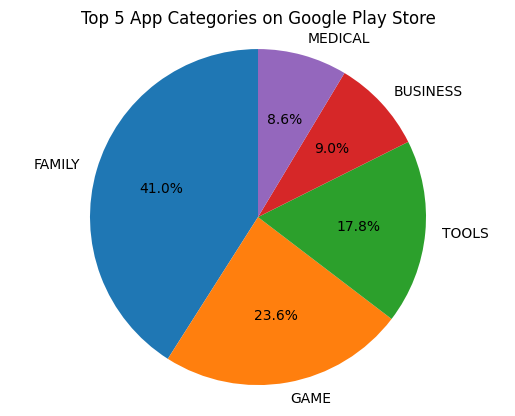

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the counts of each category in the 'Category' column
category_counts = dataset['Category'].value_counts()

# Select the top 5 categories
top_categories = category_counts.head(5)

# Plot a pie chart for the top 5 categories
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90)

# Set axis equal to ensure a circular pie chart
plt.axis('equal')

# Set the title of the plot
plt.title('Top 5 App Categories on Google Play Store')

# Display the plot
plt.show()

Rating Distribution

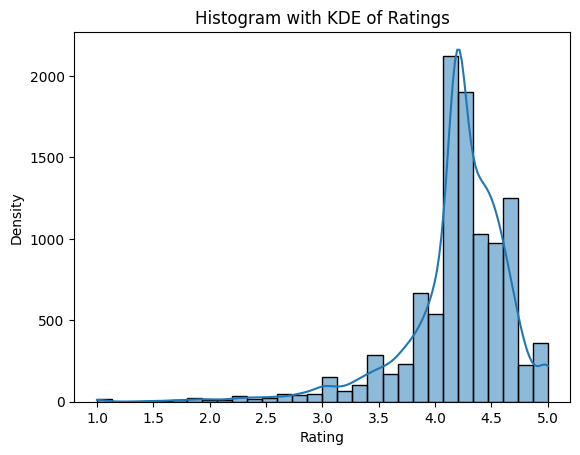

In [ ]:
import seaborn as sns
# Create a histogram with KDE for the 'Rating' column in the 'dataset'
sns.histplot(dataset['Rating'], kde=True, bins=30)

# Set the title, x-axis label, and y-axis label
plt.title('Histogram with KDE of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

# Display the plot
plt.show()

Distribution of App Type

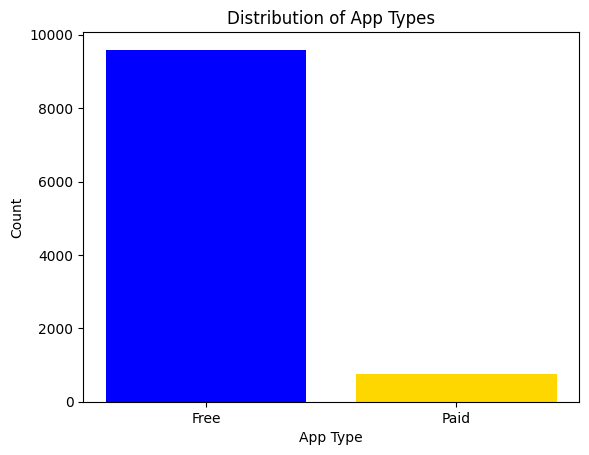

In [ ]:
import matplotlib.pyplot as plt
# Calculate the counts of each app type in the 'Type' column
type_counts = dataset['Type'].value_counts()

# Plot a bar chart for the distribution of app types
plt.bar(type_counts.index, type_counts, color=['blue', 'gold'])

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of App Types')
plt.xlabel('App Type')
plt.ylabel('Count')

# Display the plot
plt.show()

Distribution of App Content Ratings

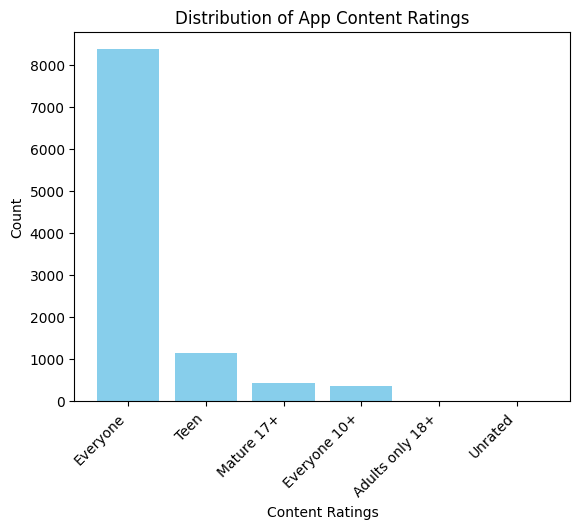

In [ ]:
import matplotlib.pyplot as plt
# Calculate the counts of each content rating in the 'Content Rating' column
content_rating_counts = dataset['Content Rating'].value_counts()

# Plot a bar chart for the distribution of app content ratings
plt.bar(content_rating_counts.index, content_rating_counts, color='skyblue')

# Set the title, x-axis label, y-axis label, and rotate x-axis labels for better readability
plt.title('Distribution of App Content Ratings')
plt.xlabel('Content Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Category distribution

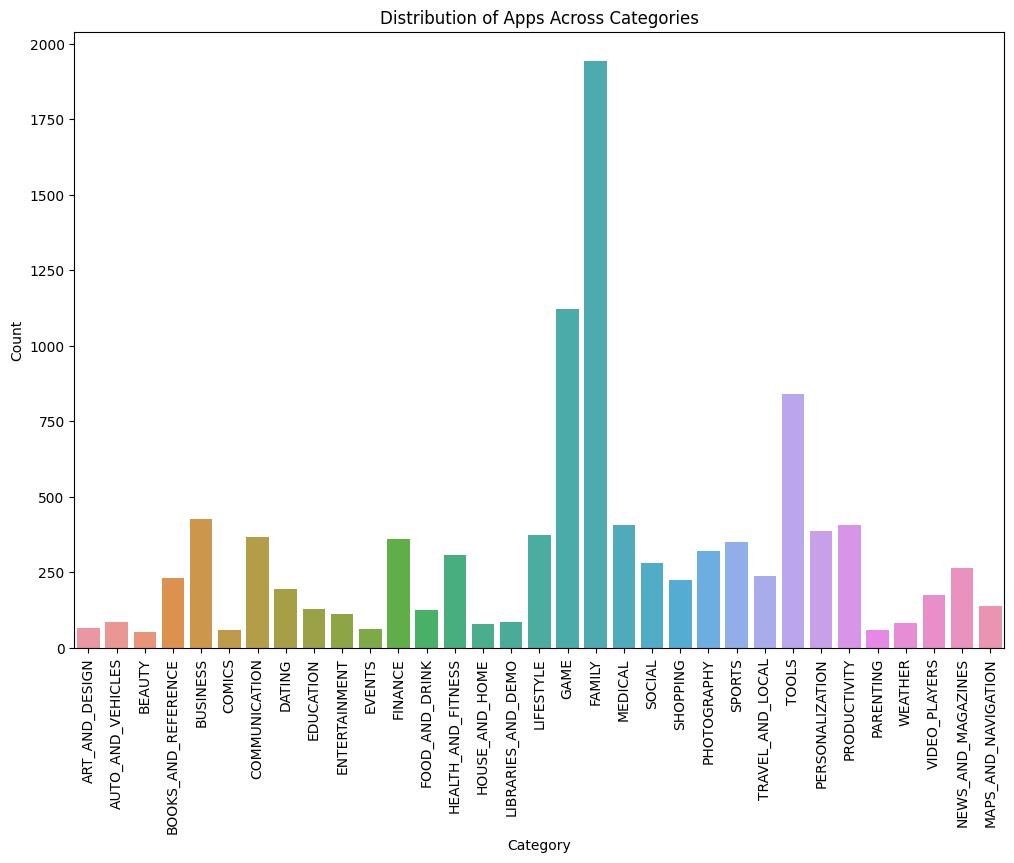

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a count plot for the distribution of apps across categories
sns.countplot(x='Category', data=dataset)

# Set the title, x-axis label, y-axis label, and rotate x-axis labels for better readability
plt.title('Distribution of Apps Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Bivariate Analysis

Numeric Data

In [ ]:
# Select columns with numeric data types in the 'dataset'
numeric_dataset = dataset.select_dtypes(include='number')

# Print the selected numeric columns
print(numeric_dataset)

         Rating  Reviews     Size  Installs  Price  Updated_Month  \
0      4.100000      159  19.0000     10000      0              1   
1      3.900000      967  14.0000    500000      0              1   
2      4.700000    87510   0.0087   5000000      0              8   
3      4.500000   215644  25.0000  50000000      0              6   
4      4.300000      967   0.0028    100000      0              6   
...         ...      ...      ...       ...    ...            ...   
10836  4.500000       38  53.0000      5000      0              7   
10837  5.000000        4   0.0036       100      0              7   
10838  4.193338        3   0.0095      1000      0              1   
10839  4.500000      114   0.0000      1000      0              1   
10840  4.500000   398307  19.0000  10000000      0              7   

       Updated_Year  
0              2018  
1              2018  
2              2018  
3              2018  
4              2018  
...             ...  
10836          20

Categorical Data

In [ ]:
# Select columns with non-numeric data types in the 'dataset'
categorical_dataset = dataset.select_dtypes(exclude='number')

# Print the selected categorical columns
print(categorical_dataset)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Type Content Rating 

Last Updated vs installs

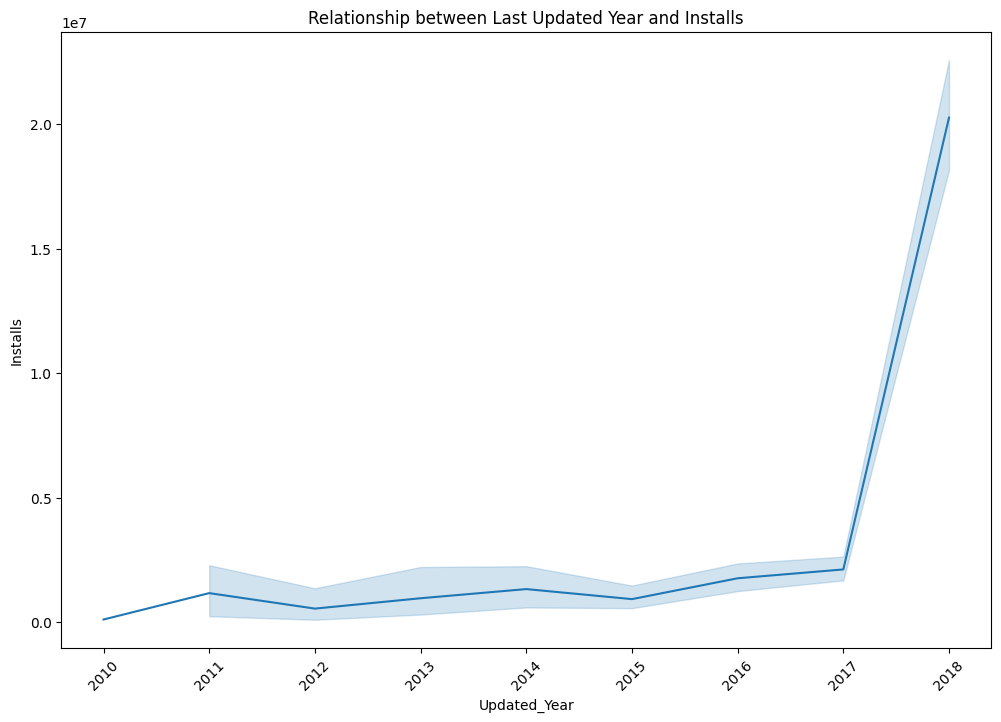

In [ ]:
import seaborn as sns
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a line plot for the relationship between 'Updated_Year' and 'Installs'
sns.lineplot(x='Updated_Year', y='Installs', data=dataset)

# Set the title, x-axis label, y-axis label, and rotate x-axis labels for better readability
plt.title('Relationship between Last Updated Year and Installs')
plt.xlabel('Updated_Year')
plt.ylabel('Installs')
plt.xticks(rotation=45)

# Display the plot
plt.show()

App Rating by Type

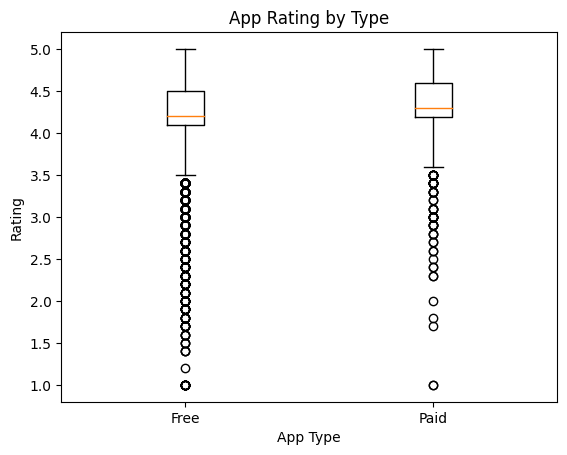

In [ ]:
# Create a boxplot for the distribution of app ratings by type (Free or Paid)
plt.boxplot([dataset[dataset['Type'] == 'Free']['Rating'], dataset[dataset['Type'] == 'Paid']['Rating']],labels=['Free', 'Paid'])

# Set the x-axis label, y-axis label, and title
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.title('App Rating by Type')

# Display the plot
plt.show()

Correlation matrix

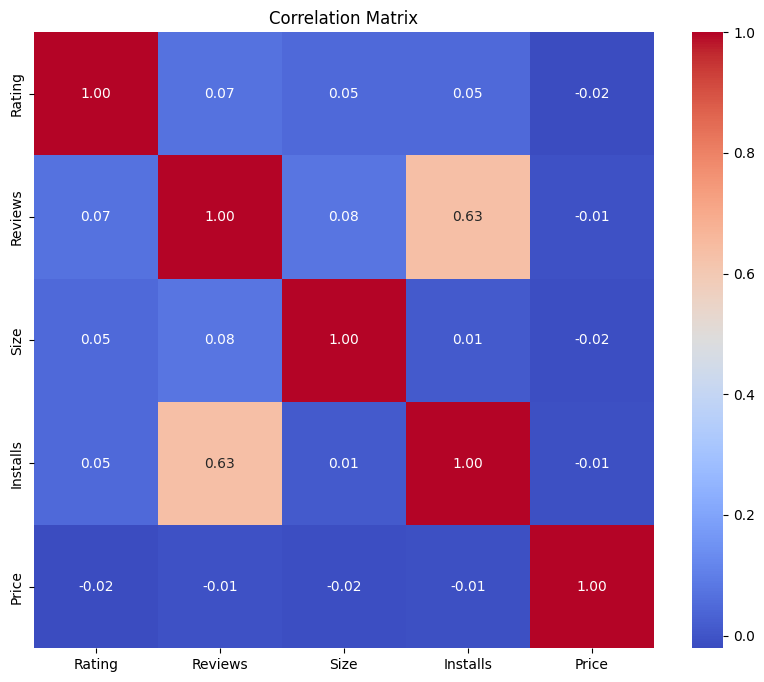

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dataset[['Rating', 'Reviews', 'Size','Installs','Price']].corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Pair Plot

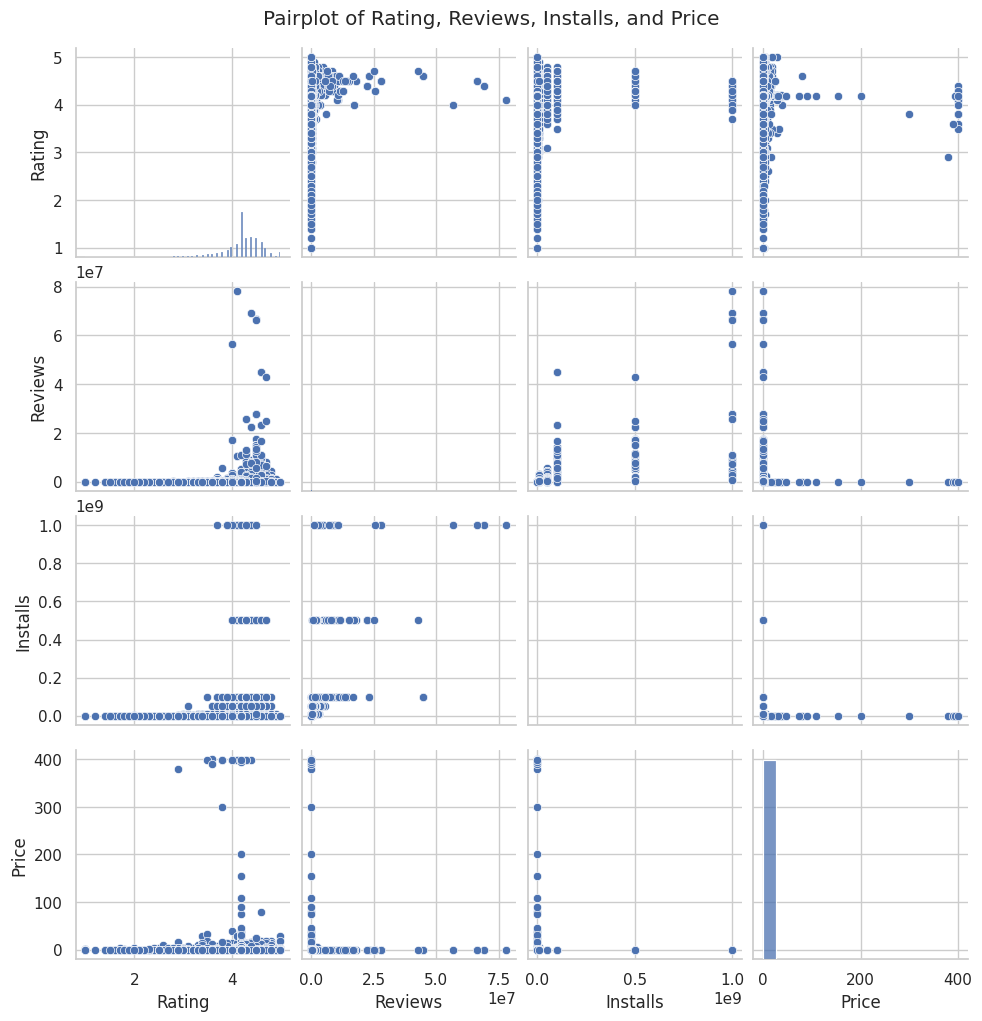

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot to whitegrid
sns.set(style="whitegrid")

# Create a pairplot for the specified columns
sns.pairplot(dataset[['Rating', 'Reviews', 'Installs', 'Price']])

# Set the title above the plot
plt.suptitle("Pairplot of Rating, Reviews, Installs, and Price", y=1.02)

# Display the plot
plt.show()



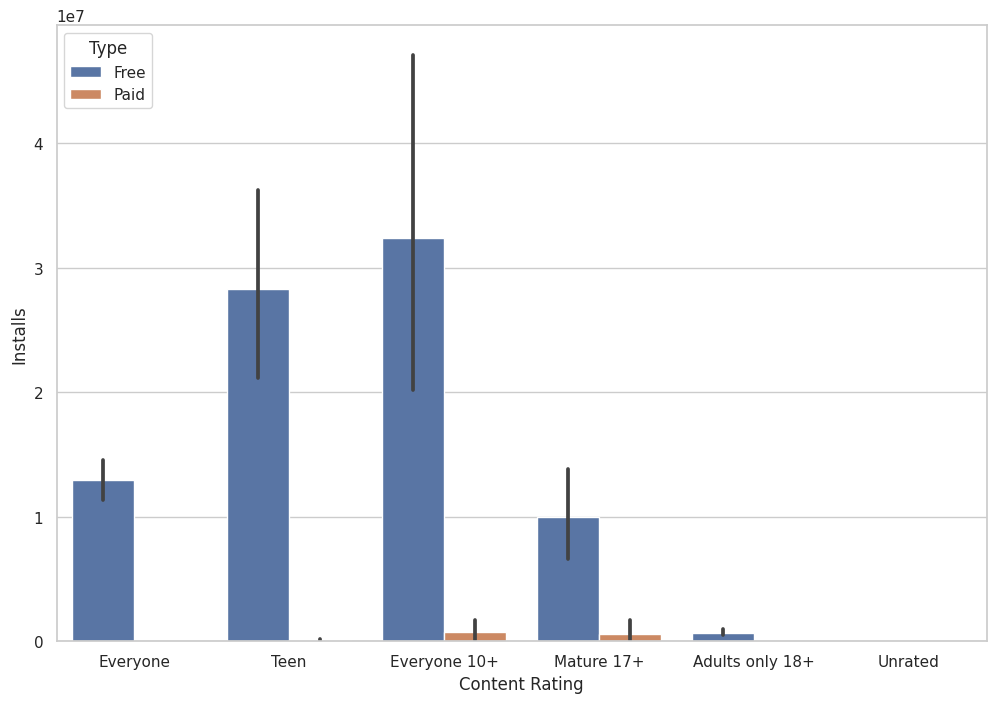

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for 'Installs' across different 'Content Ratings' with 'Type' as a hue
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=dataset)

# Display the plot
plt.show()